r# Prompt length
Computed on raw prompts
length of raw prompt is a proxy for context

- count tokens for each prompt
- average token count per user
- average token count per gender




In [4]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("../../giicg.db")
prompts = pd.read_sql("Select * from expanded_prompts", conn)
prompts = prompts.drop_duplicates(subset=['message_text'])
prompts

,message_id,conversation_id,role,message_text,conversational,code,other,gender,user_id,language
0,1,1,user,"parsing data from python iterator, how it coul...","parsing data from python iterator, how it coul...",,,Man (cisgender),6,en
1,730,32,user,Write python function to do operations with in...,Write python function to do operations with in...,,report_dt\tsource\tmetric_name\tmetric_num\tme...,Man (cisgender),6,en
2,1133,55,user,Write shortest tutorial on creating RAG on ema...,Write shortest tutorial on creating RAG on ema...,,,Man (cisgender),6,en
3,1135,55,user,what is FAISS,what is FAISS,,,Man (cisgender),6,en
4,1137,55,user,Transform given code to process large .mbox file,Transform given code to process large .mbox file,,Transform given code to process large .mbox file,Man (cisgender),6,en
...,...,...,...,...,...,...,...,...,...,...
748,1646,82,user,"def run_query(query, n_results):\n query_em...",this is my code. I want to: Get nodes and edge...,"def run_query(query, n_results):\n query_em...",,Man (cisgender),92,en
749,1845,37,user,\n nun möchte ich judgement balancing m...,Now I want to bring judgement balancing into t...,,,Woman (cisgender),29,de
750,1847,37,user,\n ich sehe keine veränderung im Plot. Was ...,I do not see any change in the plot.,,,Woman (cisgender),29,de
751,1849,2,user,\n I am working on the problem of reconstru...,\n I am working on the problem of reconstru...,,Classic CV - Drone navigation\nIf you ever tho...,Man (cisgender),8,en


In [5]:
import spacy
tokenizer = spacy.blank("en")
prompts['token_count'] = prompts['conversational'].apply(lambda x: len(tokenizer(x)) if isinstance(x, str) else 0)
prompts


,message_id,conversation_id,role,message_text,conversational,code,other,gender,user_id,language,token_count
0,1,1,user,"parsing data from python iterator, how it coul...","parsing data from python iterator, how it coul...",,,Man (cisgender),6,en,18
1,730,32,user,Write python function to do operations with in...,Write python function to do operations with in...,,report_dt\tsource\tmetric_name\tmetric_num\tme...,Man (cisgender),6,en,133
2,1133,55,user,Write shortest tutorial on creating RAG on ema...,Write shortest tutorial on creating RAG on ema...,,,Man (cisgender),6,en,9
3,1135,55,user,what is FAISS,what is FAISS,,,Man (cisgender),6,en,3
4,1137,55,user,Transform given code to process large .mbox file,Transform given code to process large .mbox file,,Transform given code to process large .mbox file,Man (cisgender),6,en,8
...,...,...,...,...,...,...,...,...,...,...,...
748,1646,82,user,"def run_query(query, n_results):\n query_em...",this is my code. I want to: Get nodes and edge...,"def run_query(query, n_results):\n query_em...",,Man (cisgender),92,en,57
749,1845,37,user,\n nun möchte ich judgement balancing m...,Now I want to bring judgement balancing into t...,,,Woman (cisgender),29,de,60
750,1847,37,user,\n ich sehe keine veränderung im Plot. Was ...,I do not see any change in the plot.,,,Woman (cisgender),29,de,10
751,1849,2,user,\n I am working on the problem of reconstru...,\n I am working on the problem of reconstru...,,Classic CV - Drone navigation\nIf you ever tho...,Man (cisgender),8,en,27


In [6]:
import pandas as pd
import numpy as np

# Compute Q1 (25th percentile), Q3 (75th percentile), and IQR
Q1 = prompts['token_count'].quantile(0.10)
Q3 = prompts['token_count'].quantile(0.90)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = prompts[(prompts['token_count'] < lower_bound) | (prompts['token_count'] > upper_bound)]

print(f"Outliers (based on IQR):\n{outliers[['conversational', 'token_count']]}")


Outliers (based on IQR):
                                        conversational  token_count
1    Write python function to do operations with in...          133
29   These are my column names: ['PassengerId', 'Pc...          104
61   I have a dataframe with columns "claim" and "d...          110
74   as a NLP and LLM researcher, I am recently dow...           99
114  adjust the above example in the following mann...           88
173  okay now a somewhat complicated question, I ha...           91
188  so and now comes the actual function, I want t...           89
229  here i have my model which uses concatenation ...          257
238  now i want to do some early fusion, starting w...          103
281  I have a csv named "manual_labels.csv". It is ...           90
498  we found the dataset on the website of the uni...          305
613  A programming question, object oriented progra...          101
663  hey, I am writing an application. Because I wa...          109
702  ok, let us create 

/var/folders/w6/f5trsq6n2jx87f1mqgd_4vv80000gn/T/ipykernel_4928/2957431194.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='token_count', data=user_avg_tokens, palette={'Man (cisgender)': 'skyblue', 'Woman (cisgender)': 'lightcoral'})


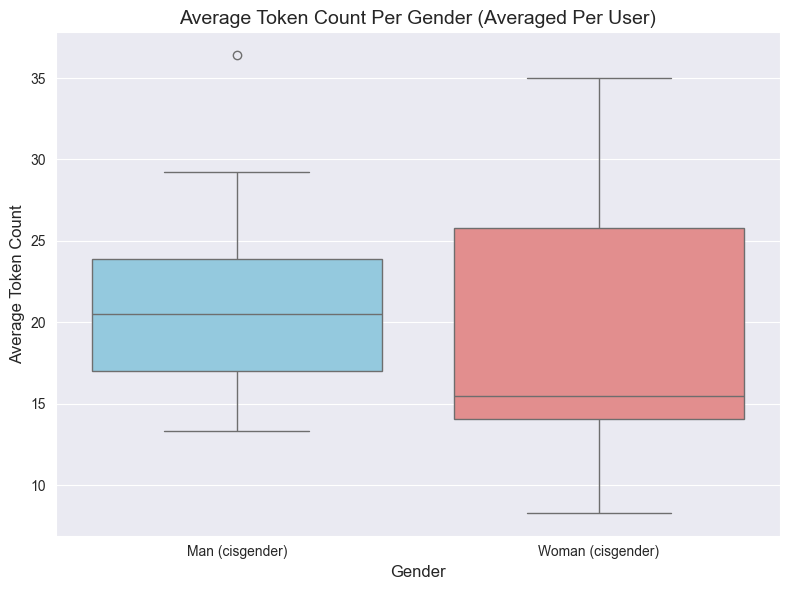

,user_id,gender,token_count,no_messages
0,6,Man (cisgender),24.333333,9
1,8,Man (cisgender),21.000000,2
2,11,Woman (cisgender),19.818182,11
3,15,Man (cisgender),13.333333,3
4,16,Woman (cisgender),25.800000,25
5,25,Man (cisgender),29.250000,4
6,28,Woman (cisgender),29.181818,22
7,29,Woman (cisgender),35.000000,2
8,31,Man (cisgender),20.200000,5
9,34,Man (cisgender),22.484848,66


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

filtered_prompts = prompts[
    (prompts['gender'].isin(['Man (cisgender)', 'Woman (cisgender)'])) &
    (prompts['user_id'] != 81) # excluded this for now, since an error message is present in one prompt which needs te be filtered out
]


# Calculate average token count per user
user_avg_tokens = (
    filtered_prompts
    .groupby(['user_id', 'gender'])
    .agg(token_count=('token_count', 'mean'),  # Average token count per user
         no_messages=('token_count', 'count'))  # Number of rows per user
    .reset_index()
)


# Create a boxplot for average token count per gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='token_count', data=user_avg_tokens, palette={'Man (cisgender)': 'skyblue', 'Woman (cisgender)': 'lightcoral'})
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Average Token Count', fontsize=12)
plt.title('Average Token Count Per Gender (Averaged Per User)', fontsize=14)
plt.tight_layout()
plt.show()



user_avg_tokens


## T-test

In [8]:
from statsmodels.stats.multitest import multipletests
from helpers.statistical_tests import compare_genders


def groupwise_comparison_with_correction(df, columns, one_sided=False, direction="greater"):
    stat_vals = []
    dfs= []
    p_vals = []
    test_types = []
    directions = []
    one_sideds = []
    female_means = []
    male_means = []
    female_stds = []
    male_stds = []
    n_females = []
    n_males = []
    nonzero_females = []
    nonzero_males = []
    effsizes = []
    effsize_types = []
    cis = []
    for col in columns:
        result = compare_genders(df, col, one_sided=one_sided, direction=direction)
        stat_vals.append(result['test_statistic'])
        dfs.append(result['df'])
        p_vals.append(result['p_value'])
        test_types.append(result['test_type'])
        directions.append(result['direction'])
        one_sideds.append(result['one_sided'])
        female_means.append(result['m_female'])
        male_means.append(result['m_male'])
        female_stds.append(result['std_female'])
        male_stds.append(result['std_male'])
        n_females.append(result['n_female'])
        n_males.append(result['n_male'])
        nonzero_females.append(result['hits_female'])
        nonzero_males.append(result['hits_male']),
        effsizes.append(result['effect_size']),
        effsize_types.append(result['effect_size_type'])
        cis.append(result['effect_size_CI'])
    reject, pvals_corrected, _, _ = multipletests(p_vals, alpha=0.05, method='fdr_bh')

    results = pd.DataFrame({
        'word': columns,
        'test type': test_types,
        'direction': directions,
        'one_sided': one_sideds,
        'df': dfs,
        'stat_value': stat_vals,
        'p_value': p_vals,
        'corrected p_value': pvals_corrected,
        'mean_f': female_means,
        'mean_m': male_means,
        'std_f': female_stds,
        'std_m': male_stds,
        'n_f': n_females,
        'n_m': n_males,
        'n_hits_f': nonzero_females,
        'n_hits_m': nonzero_males,
        'effsize': effsizes,
        'effsize_type': effsize_types,
        'ci': cis,
    })
    return results

In [9]:
raw_prompt_length_results = groupwise_comparison_with_correction(user_avg_tokens, ['token_count']).sort_values(by="p_value", ascending=True)
raw_prompt_length_results

,word,test type,direction,one_sided,df,stat_value,p_value,corrected p_value,mean_f,mean_m,std_f,std_m,n_f,n_m,n_hits_f,n_hits_m,effsize,effsize_type,ci
0,token_count,T-test,two-sided,False,23.358073,0.822222,0.419265,0.419265,19.021861,21.2665,7.703138,6.358879,13,14,13,14,0.319011,Cohen's d,"[-0.41, 1.22]"
